In [ ]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parents[0]))
from model_training_src.cleaner import DataCleaner


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")



## Data Loading & Inspection

In [ ]:
# project root
project_root = Path().resolve().parents[0]   # specify the root path which is one level above the current working directory

# data paths
data_path1 = project_root /"data" / "Existing Staff.csv"
data_path2 = project_root /"data"/"Exited Staff.csv"

# into dataframes
df_1 = pd.read_csv(data_path1)
df_2 = pd.read_csv(data_path2)

In [ ]:
# display df_existing
df_1.head()

,S/N,Job Title,Department,Age,Gender,Marital Status,Years of Service,Salary
0,1,HR Specialist,Human Resources,25,Male,Married,2,537.25
1,2,Project Manager,Sales & Marketing,53,Male,Single,8,154.13
2,3,Billing Specialist,IT & Software,44,Female,Married,8,368.54
3,4,Marketing Analyst,Data Analytics,37,Female,Married,7,269.92
4,5,Product Manager,IT & Software,30,Male,Single,4,131.17


In [ ]:
# display df_exit
df_2.head()

,Job Title,Department,Age,Gender,Marital Status,Years of Service,Mode of Exit,Date of Exit,Reasons For Exit,Salary
0,Marketing Analyst,Field Operations,31,Female,Single,4,Termination,9/30/2024,Policy violation,338.541667
1,Marketing Analyst,Field Operations,60,Female,Single,6,Retirement,8/21/2023,Work-life balance,357.333333
2,Marketing Analyst,Sales & Marketing,60,Male,Married,5,Retirement,1/11/2024,End of service,594.416667
3,Software Developer,Data Analytics,26,Female,Married,7,Termination,5/2/2023,End of service,439.583333
4,Sales Executive,Project Management,60,Female,Married,2,Retirement,2/14/2024,Policy violation,737.916667


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S/N               3500 non-null   int64  
 1   Job Title         3500 non-null   object 
 2   Department        3500 non-null   object 
 3   Age               3500 non-null   int64  
 4   Gender            3500 non-null   object 
 5   Marital Status    3500 non-null   object 
 6   Years of Service  3500 non-null   int64  
 7   Salary            3500 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 218.9+ KB


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Title         820 non-null    object 
 1   Department        820 non-null    object 
 2   Age               820 non-null    int64  
 3   Gender            820 non-null    object 
 4   Marital Status    820 non-null    object 
 5   Years of Service  820 non-null    int64  
 6   Mode of Exit      820 non-null    object 
 7   Date of Exit      820 non-null    object 
 8   Reasons For Exit  820 non-null    object 
 9   Salary            820 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 64.2+ KB


## Summary statistics

In [ ]:
# print summary statistics of both datasets
print("Summary Statistics for Existing Staff:") 
df_1.describe(include='all').T

Summary Statistics for Existing Staff:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S/N,3500.0,NaN,NaN,NaN,1750.5,1010.507298,1.0,875.75,1750.5,2625.25,3500.0
Job Title,3500,12,Customer Support Agent,314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,3500,9,Human Resources,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,3500.0,NaN,NaN,NaN,39.055714,10.899921,22.0,29.0,39.0,49.0,58.0
Gender,3500,2,Female,1758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,3500,2,Married,1777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of Service,3500.0,NaN,NaN,NaN,5.000571,2.220871,1.0,3.0,5.0,7.0,8.0
Salary,3500.0,NaN,NaN,NaN,357.746777,133.120345,125.08,260.1975,348.63,438.5825,749.08


In [ ]:
print("\nSummary Statistics for Exited Staff:")
df_2.describe(include='all').T


Summary Statistics for Exited Staff:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Job Title,820,12,Marketing Analyst,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,820,9,Billing,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,820.0,NaN,NaN,NaN,47.307317,12.603106,22.0,37.0,50.0,60.0,60.0
Gender,820,2,Female,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,820,2,Single,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of Service,820.0,NaN,NaN,NaN,4.842683,2.551235,1.0,2.0,4.0,7.0,10.0
Mode of Exit,820,3,Resignation,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Exit,820,497,12/19/2024,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reasons For Exit,820,9,Better opportunity,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,820.0,NaN,NaN,NaN,351.067581,134.754053,125.333333,248.697917,339.770833,433.625,737.916667


## Exploring Distributions

### (a) Numerical Features

In [ ]:
import math 

def plot_histograms(df, bins=20, n_cols=3, figsize_per_plot=(6, 4), kde=True):
    """
    Plots histograms for all numerical columns in a DataFrame.
    
    Args:
    -----------
    df (dp.DataFrame): The dataset containing numeric columns.
    bins (int): Optional (default=20) Number of bins for each histogram.
    n_cols (int): Optional (default=3) Number of columns in the subplot grid.
    figsize_per_plot (tuple): optional, (default=(6,4)) Size of each subplot (width, height).
    kde (bool): Optional (default=True), Whether to overlay a Kernel Density Estimate (smooth curve).
    """
    
    # Get list of numerical columns
    numerical_columns = df.select_dtypes(include="number").columns.tolist()
    
    if not numerical_columns:
        print("No numerical columns found in the DataFrame.")
        return
    
    # Determine grid size
    n_rows = math.ceil(len(numerical_columns) / n_cols)
    
    # Create figure
    plt.figure(figsize=(figsize_per_plot[0] * n_cols, figsize_per_plot[1] * n_rows))
    
    # Iterate through each column
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[column], kde=kde, bins=bins)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

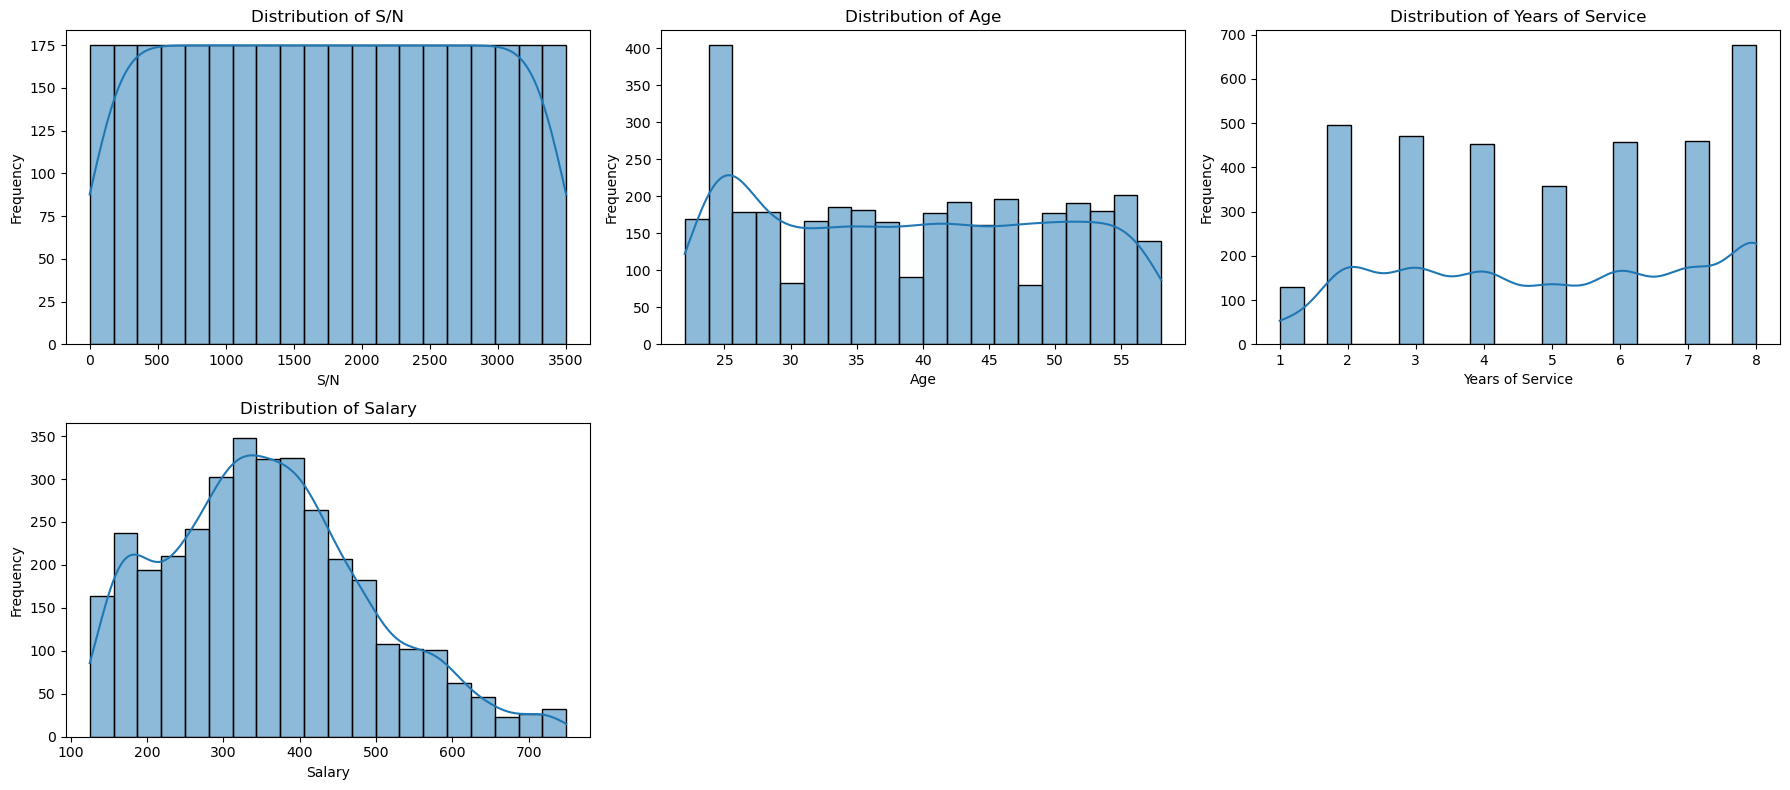

In [ ]:
# hisptogram plot for existing employee data
plot_histograms(df_1, bins=20, kde=True)

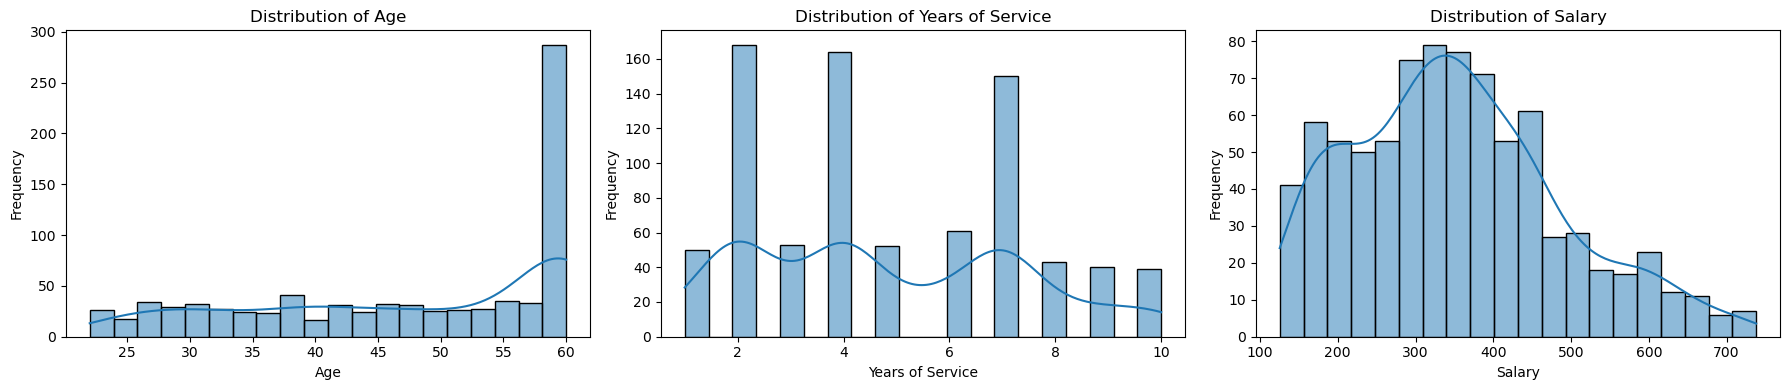

In [ ]:
# histogram plot for exited employee data
plot_histograms(df_2, kde=True)

### (b) Categorical features

In [ ]:
def plot_countplot(df, columns, n_cols=3, figsize_per_plot=(8,6), fontsize=12, rotation=0):
    """
    Plots countplots for specified categorical columns in the DataFrame as subplots.

    Args:
        df (pd.DataFrame): The dataset containing the columns to plot.
        columns (list): List of categorical column names to plot.
        n_cols (int): Number of columns in the subplot grid.
        figsize_per_plot (tuple): Size of each subplot (width, height).
        fontsize (int): Font size for data labels.
        rotation (int): Angle of x-axis labels.
    """
    cat_feats = len(columns)
    if cat_feats == 0:
        print('No columns specified to plot')
        return

    n_rows = math.ceil(cat_feats / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize_per_plot[0] * n_cols, figsize_per_plot[1] * n_rows))
    axes = axes.flatten() if cat_feats > 1 else [axes]

    for i, column in enumerate(columns):
        ax = axes[i]
        sns.countplot(x=df[column], ax=ax)
        ax.set_title(f"Count of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', labelrotation=rotation)
        ax.tick_params(axis='y', left=False, labelleft=False)
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', fontsize=fontsize)

    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


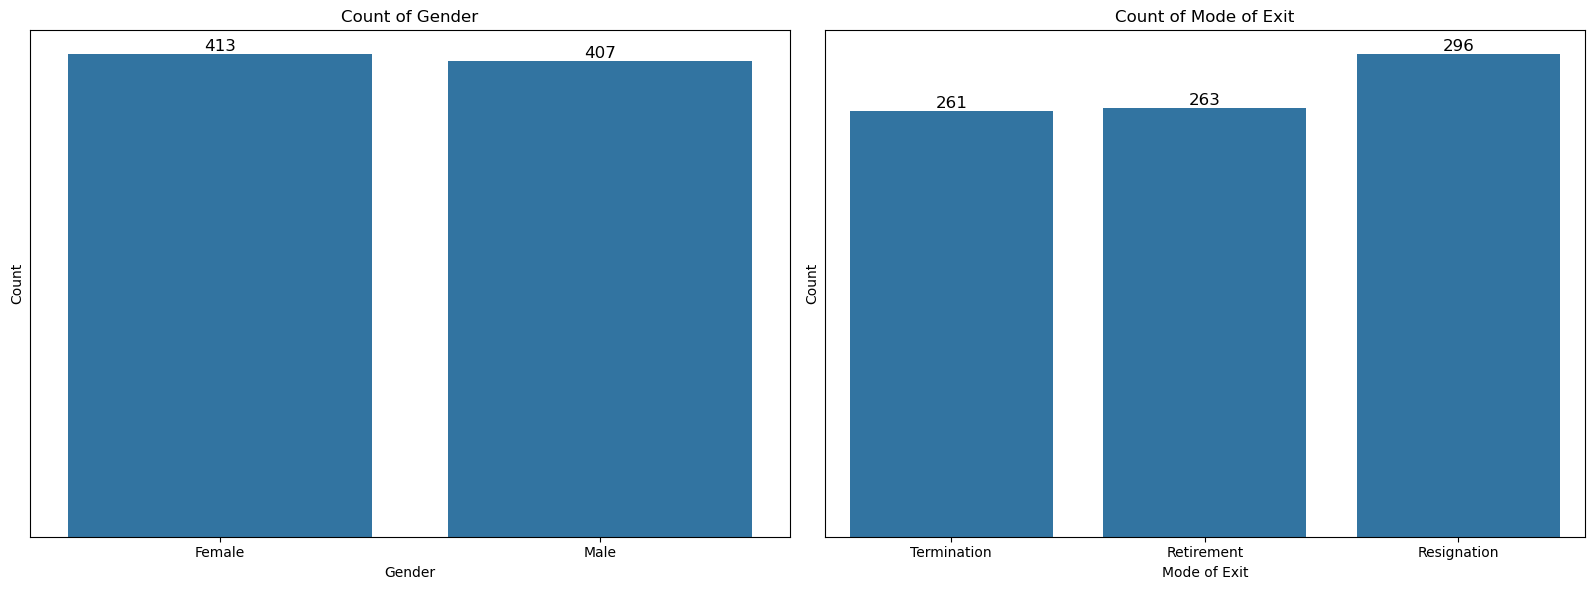

In [ ]:
plot_countplot(df_2, ['Gender', 'Mode of Exit'])

## **Correlations**

In [ ]:
# function to get correlation heatmap
def plot_correlation_heatmap(df, title):
    plt.figure(figsize=(12, 8))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

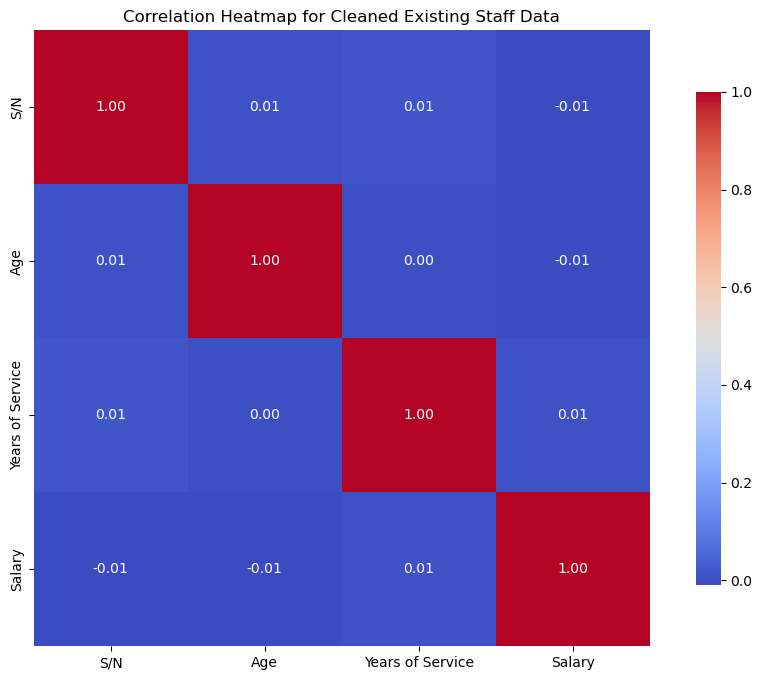

In [ ]:
# plotting correlation heatmap for df_1
plot_correlation_heatmap(df_1, "Correlation Heatmap for Existing Staff Data")

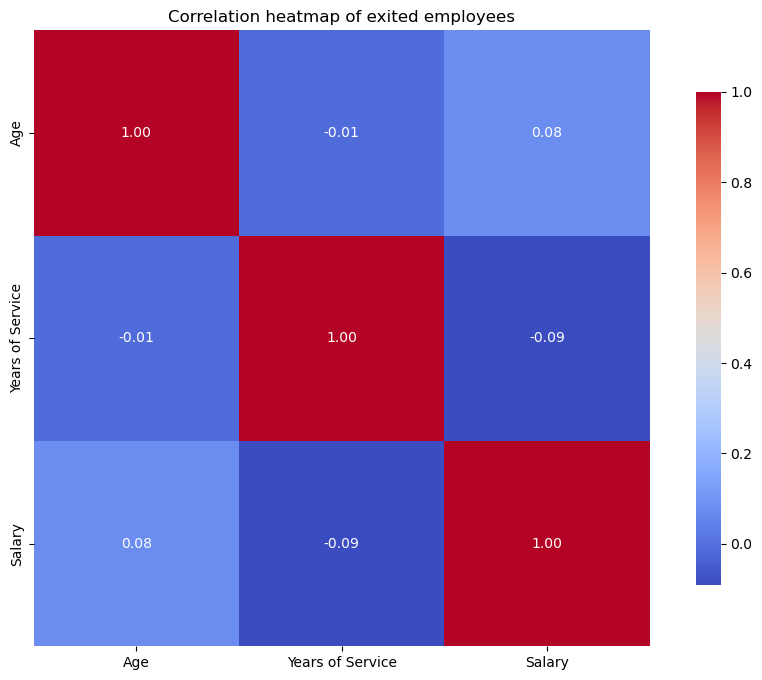

In [ ]:
# correlation heatmap of exited employees
plot_correlation_heatmap(df_2, "Correlation heatmap of exited employees")

## **BoxPlots - Exploring outliers**

In [ ]:
def plot_boxplots(df):
    """
    Plots boxplots for all numeric features in the DataFrame as subplots.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
    """
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    num_cols = len(numeric_cols)
    if num_cols == 0:
        print("No numeric columns to plot.")
        return

    fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5))
    if num_cols == 1:
        axes = [axes]

    for ax, col in zip(axes, numeric_cols):
        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()



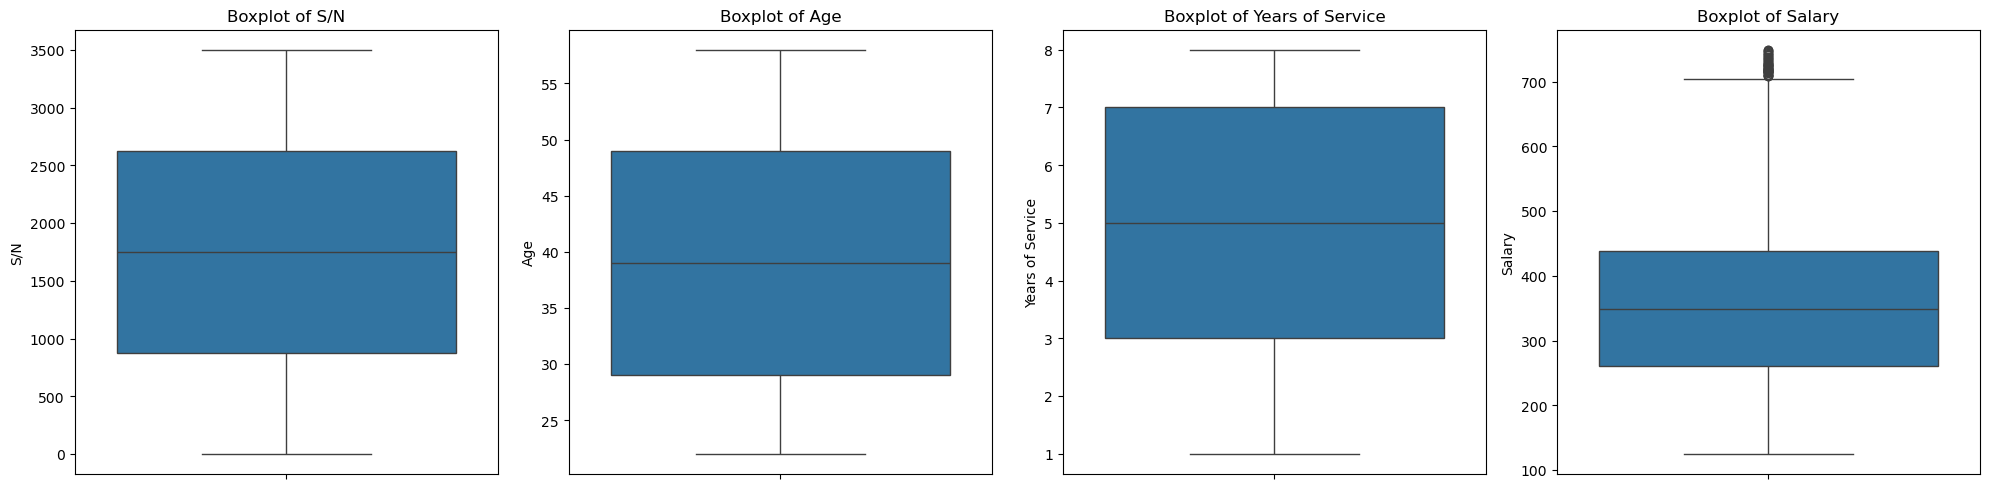

In [ ]:
# boxplot for existing staff data
plot_boxplots(df_1)

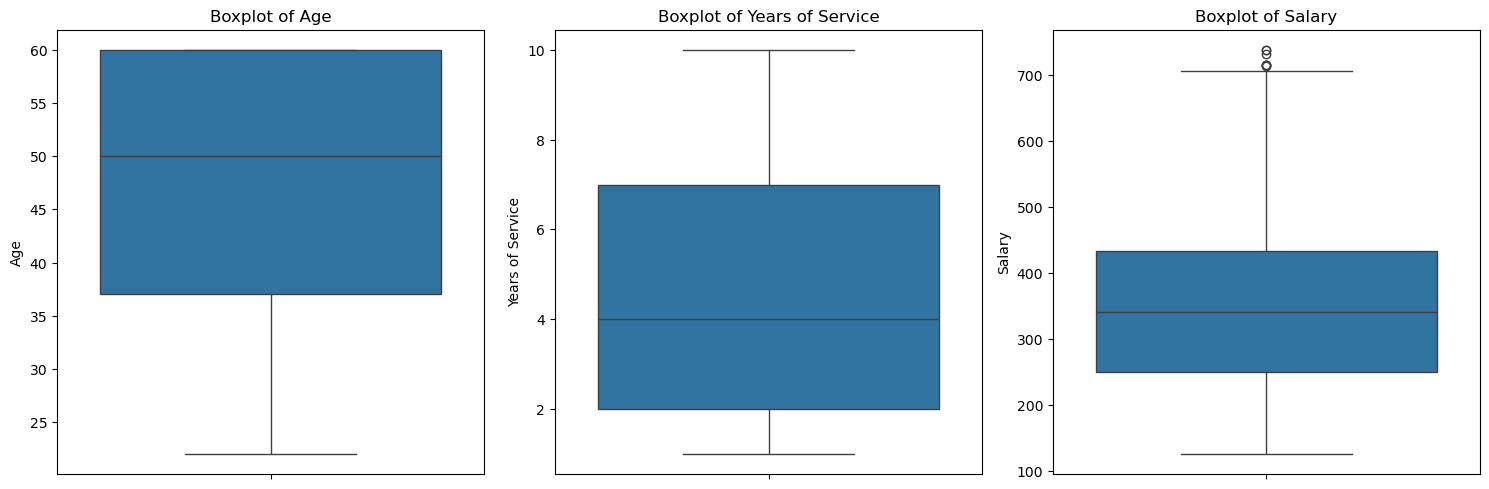

In [ ]:
# boxplot for exited staff data
plot_boxplots(df_2)